# MESC analysis

In [1]:
setwd("..")
library(data.table)
library(tidyverse)
library(wesanderson)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [2]:
all.gene <- read.table("out/all.gene.PGC3_SCZ_wave3.european.autosome.public.v3.all.h2med", header = T)
all.gene

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
h2med,0.01102589,0.004399838,0.03154292,0.01245856
h2nonmed,0.33852597,0.014372453,0.96845708,0.01245856
h2,0.34955186,0.014462320,1.00000000,0.00000000


In [3]:
all.iso <- read.table("out/all.iso.PGC3_SCZ_wave3.european.autosome.public.v3.all.h2med", header = T)

In [4]:
all.intron <- read.table("out/all.intron.PGC3_SCZ_wave3.european.autosome.public.v3.all.h2med", header = T)

In [7]:
df <- rbind(all.gene, all.iso, all.intron)
df$Category <- c(rep("Genes", 3), rep("Isoforms", 3), rep("Introns", 3))
df <- df %>% filter(Quantity == "h2med")
df$Category <- factor(df$Category, levels = c("Genes", "Isoforms", "Introns"))
df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)
df

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.,Category,ZSCORE.est_over_h2,PVAL.est_over_h2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
h2med,0.011025886,0.004399838,0.03154292,0.01245856,Genes,2.531826,0.0056735073
h2med,0.022719218,0.006794974,0.06454355,0.01918199,Isoforms,3.364800,0.0003829957
h2med,0.007429701,0.006103173,0.02132463,0.01735272,Introns,1.228892,0.1095560635


In [8]:
signif_gene <- data.frame("Category" = "Genes", "Estimate_over_h2" = 0.03154292 + 0.01245856 + 0.002)
signif_iso <- data.frame("Category" = "Isoforms", "Estimate_over_h2" = 0.06454355 + 0.01918199 + 0.002)

In [9]:
colors <- c("Genes" = "#648FFF", "Isoforms" = "#DC267F", "Introns" = "#FFB000")

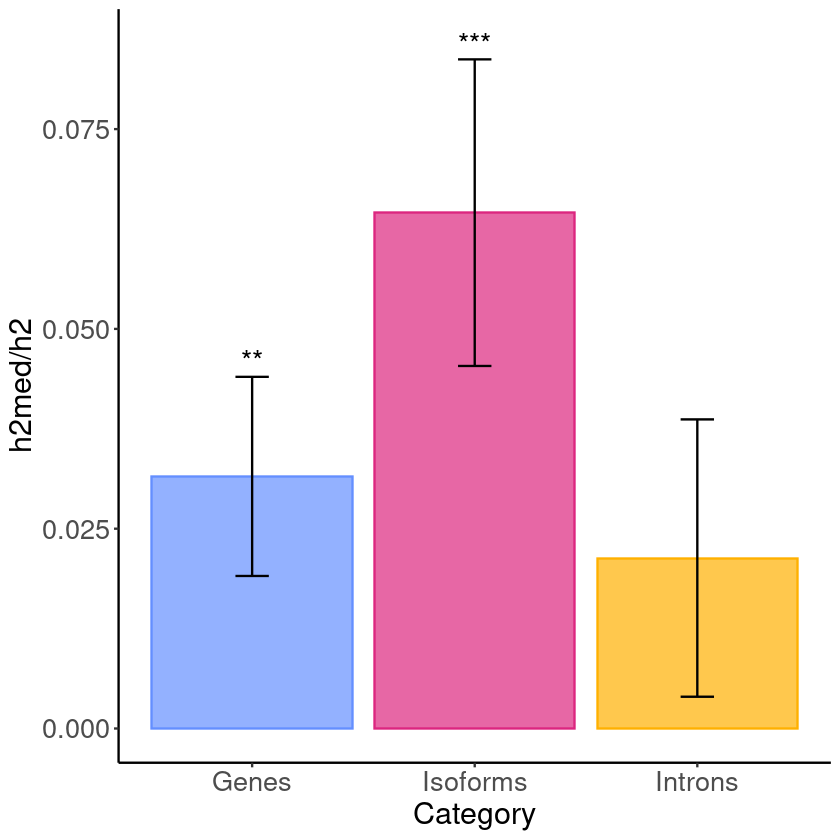

In [15]:
ggplot(df, aes(x = Category, y = Estimate_over_h2)) +
    geom_bar(stat = "identity", aes(color = Category, fill = Category), alpha = 0.7) +
    scale_color_manual(values = colors) +
    scale_fill_manual(values = colors) +
    geom_errorbar(aes(ymin = (Estimate_over_h2 - SE.Estimate_over_h2.), 
                      ymax = (Estimate_over_h2 + SE.Estimate_over_h2.)), width = .15) +
    theme_classic() +
    labs(x = "Category",
         y = "h2med/h2") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none") +
    geom_text(data = signif_gene, label = "**", size = 6) +
    geom_text(data = signif_iso, label = "***", size = 6)

In [16]:
ggsave("figures/mesc.pdf", height = 6, width = 6)

**More traits**

In [2]:
gene.results <- list.files(path = "out/", pattern = "^all.gene.*.all.h2med")
iso.results <- list.files(path = "out/", pattern = "^all.iso.*.all.h2med")
intron.results <- list.files(path = "out/", pattern = "^all.intron.*.all.h2med")

In [3]:
gene.results

[1] "all.gene.ADHD.Demontis.2019.all.h2med"                        
[2] "all.gene.ALZ.Jansen.2019.all.h2med"                           
[3] "all.gene.ASD.iPSYCHPGC.2018.all.h2med"                        
[4] "all.gene.EduYears.SSGAC.Lee2018.all.h2med"                    
[5] "all.gene.Insomnia.Jansen.2018.all.h2med"                      
[6] "all.gene.Intelligence.SavageNatGen.2018.all.h2med"            
[7] "all.gene.MDD.Howard.PGC.2019.all.h2med"                       
[8] "all.gene.pgc-bip2021-all.all.h2med"                           
[9] "all.gene.PGC3_SCZ_wave3.european.autosome.public.v3.all.h2med"

In [4]:
setwd("out")

In [5]:
for (i in 1:length(gene.results)) {
    file_name <- sub('all.gene.', '', gene.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(gene.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

gene.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
gene.df <- gene.df %>% filter(Quantity == "h2med")
gene.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
gene.df$Group <- "Genes"

In [6]:
for (i in 1:length(iso.results)) {
    file_name <- sub('all.iso.', '', iso.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(iso.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

iso.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
iso.df <- iso.df %>% filter(Quantity == "h2med")
iso.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
iso.df$Group <- "Isoforms"

In [7]:
for (i in 1:length(intron.results)) {
    file_name <- sub('all.intron.', '', intron.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(intron.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

intron.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
intron.df <- intron.df %>% filter(Quantity == "h2med")
intron.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
intron.df$Group <- "Introns"

In [8]:
df <- rbind(gene.df, iso.df, intron.df)
df <- df %>% filter(Trait != "ALZ.Jansen.2019")
df$Group <- factor(df$Group, levels = c("Introns", "Isoforms", "Genes"))
df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)
# df

In [9]:
df$FDR <- p.adjust(df$PVAL.est_over_h2, method = 'fdr')

In [9]:
df$sig <- NA
for (i in 1:nrow(df)) {
    if(df[i,'FDR'] > 0.05) {
        df[i,'sig'] <- ''
    }
    if(df[i,'FDR'] < 0.05 & df[i,'FDR'] > 0.01) {
        df[i,'sig'] <- '*'
    }
    if(df[i,'FDR'] < 0.01 & df[i,'FDR'] > 0.001) {
        df[i,'sig'] <- '**'
    }
    if(df[i,'FDR'] < 0.001) {
        df[i,'sig'] <- '***'
    }
}

In [10]:
table(df$sig)


      *  ** *** 
 15   5   3   1 

In [21]:
# sig_05 <- df %>% filter(PVAL.est_over_h2 < 0.05, PVAL.est_over_h2 > 0.01)
# sig_01 <- df %>% filter(PVAL.est_over_h2 < 0.01, PVAL.est_over_h2 > 0.001)
# sig_001 <- df %>% filter(PVAL.est_over_h2 < 0.001)

# non_sig <- df %>% filter(FDR > 0.05) # need this to align geom_text position_dodge
# sig_05 <- df %>% filter(FDR < 0.05, FDR > 0.01)
# sig_01 <- df %>% filter(FDR < 0.01, FDR > 0.001)
# sig_001 <- df %>% filter(FDR < 0.001)

In [10]:
df[df$Trait == "ADHD.Demontis.2019", 'Trait'] <- 'ADHD'
# df[df$Trait == "ALZ.Jansen.2019", 'Trait'] <- 'ALZ'
df[df$Trait == "ASD.iPSYCHPGC.2018", 'Trait'] <- 'ASD'
df[df$Trait == "EduYears.SSGAC.Lee2018", 'Trait'] <- 'EduYears'
df[df$Trait == "Insomnia.Jansen.2018", 'Trait'] <- 'Insomnia'
df[df$Trait == "Intelligence.SavageNatGen.2018", 'Trait'] <- 'Intelligence'
df[df$Trait == "MDD.Howard.PGC.2019", 'Trait'] <- 'MDD'
df[df$Trait == "pgc-bip2021-all", 'Trait'] <- 'BIP'
df[df$Trait == "PGC3_SCZ_wave3.european.autosome.public.v3", 'Trait'] <- 'SCZ'

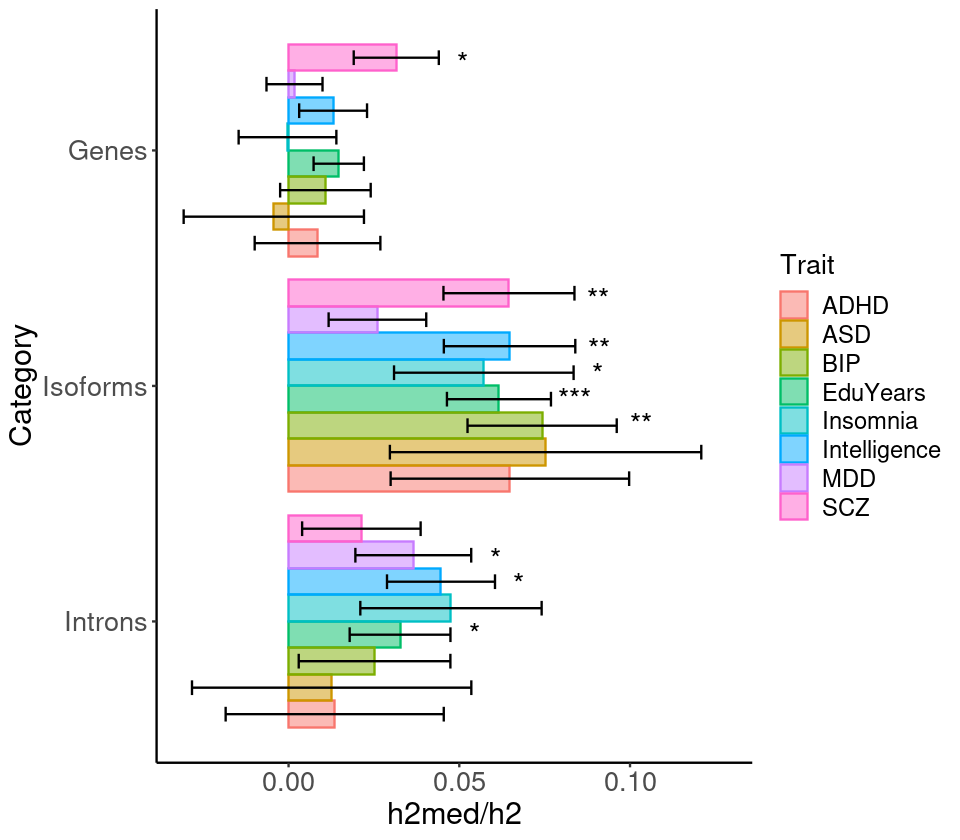

In [12]:
options(repr.plot.height = 7, repr.plot.width = 8)


ggplot(df, aes(y = Group, x = Estimate_over_h2, color = Trait, fill = Trait,
               xmin = (Estimate_over_h2 - SE.Estimate_over_h2.),
               xmax = (Estimate_over_h2 + SE.Estimate_over_h2.))) +
    geom_bar(stat = "identity", alpha = 0.5, position = position_dodge(width = .9)) +
    geom_errorbar(width = 0.5, 
                  position = position_dodge(width = .9),
                  color = "black") +
    theme_classic() +
    labs(y = "Category",
         x = "h2med/h2") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "right",
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    geom_text(aes(x = Estimate_over_h2 + SE.Estimate_over_h2. + 0.007, label = sig), 
              color = "black", size = 6, position = position_dodge(width = .85))

In [13]:
ggsave("../figures/mesc_bar.pdf", height = 7, width = 8)

**Tile plot: tri gene/intron; sex gene; cell types gene**

In [12]:
setwd("..")

In [13]:
tri1.gene.results <- list.files(path = "out/", pattern = "^tri1_25HCP.all.gene.*.all.h2med")
tri2.gene.results <- list.files(path = "out/", pattern = "^tri2_15HCP.all.gene.*.all.h2med")
tri1.intron.results <- list.files(path = "out/", pattern = "^tri1_15HCP.all.intron.*.all.h2med")
tri2.intron.results <- list.files(path = "out/", pattern = "^tri2_10HCP.all.intron.*.all.h2med")
tri1.iso.results <- list.files(path = "out/", pattern = "^tri1_35HCP.all.iso.*.all.h2med")
tri2.iso.results <- list.files(path = "out/", pattern = "^tri2_20HCP.all.iso.*.all.h2med")

In [16]:
# male.gene.results <- list.files(path = "out/", pattern = "^m_50HCP.all.gene.*.all.h2med")
# female.gene.results <- list.files(path = "out/", pattern = "^f_50HCP.all.gene.*.all.h2med")

In [14]:
setwd("out")

In [15]:
for (i in 1:length(tri1.gene.results)) {
    file_name <- sub('tri1_25HCP.all.gene.', '', tri1.gene.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(tri1.gene.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

tri1.gene.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
tri1.gene.df <- tri1.gene.df %>% filter(Quantity == "h2med")
tri1.gene.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
tri1.gene.df$Group <- "Tri1 genes"

In [16]:
for (i in 1:length(tri2.gene.results)) {
    file_name <- sub('tri2_15HCP.all.gene.', '', tri2.gene.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(tri2.gene.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

tri2.gene.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
tri2.gene.df <- tri2.gene.df %>% filter(Quantity == "h2med")
tri2.gene.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
tri2.gene.df$Group <- "Tri2 genes"

In [20]:
# for (i in 1:length(male.gene.results)) {
#     file_name <- sub('m_50HCP.all.gene.', '', male.gene.results[i])
#     file_name <- sub('.all.h2med', '', file_name)
#     file_df <- read.table(male.gene.results[i], header = T, stringsAsFactors = F)
#     assign(x = file_name, value = file_df, envir = .GlobalEnv)
# }

# male.gene.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
#                 EduYears.SSGAC.Lee2018, 
#                 Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
#                 PGC3_SCZ_wave3.european.autosome.public.v3)
# male.gene.df <- male.gene.df %>% filter(Quantity == "h2med")
# male.gene.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
#                   "EduYears.SSGAC.Lee2018", 
#                   "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
#                   "PGC3_SCZ_wave3.european.autosome.public.v3")
# male.gene.df$Group <- "Male genes"

In [21]:
# for (i in 1:length(female.gene.results)) {
#     file_name <- sub('f_50HCP.all.gene.', '', female.gene.results[i])
#     file_name <- sub('.all.h2med', '', file_name)
#     file_df <- read.table(female.gene.results[i], header = T, stringsAsFactors = F)
#     assign(x = file_name, value = file_df, envir = .GlobalEnv)
# }

# female.gene.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
#                 EduYears.SSGAC.Lee2018, 
#                 Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
#                 PGC3_SCZ_wave3.european.autosome.public.v3)
# female.gene.df <- female.gene.df %>% filter(Quantity == "h2med")
# female.gene.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
#                   "EduYears.SSGAC.Lee2018", 
#                   "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
#                   "PGC3_SCZ_wave3.european.autosome.public.v3")
# female.gene.df$Group <- "Female genes"

In [17]:
for (i in 1:length(tri1.intron.results)) {
    file_name <- sub('tri1_15HCP.all.intron.', '', tri1.intron.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(tri1.intron.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

tri1.intron.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
tri1.intron.df <- tri1.intron.df %>% filter(Quantity == "h2med")
tri1.intron.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
tri1.intron.df$Group <- "Tri1 introns"

for (i in 1:length(tri2.intron.results)) {
    file_name <- sub('tri2_10HCP.all.intron.', '', tri2.intron.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(tri2.intron.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

tri2.intron.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
tri2.intron.df <- tri2.intron.df %>% filter(Quantity == "h2med")
tri2.intron.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
tri2.intron.df$Group <- "Tri2 introns"

In [18]:
for (i in 1:length(tri1.iso.results)) {
    file_name <- sub('tri1_35HCP.all.iso.', '', tri1.iso.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(tri1.iso.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

tri1.iso.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
tri1.iso.df <- tri1.iso.df %>% filter(Quantity == "h2med")
tri1.iso.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
tri1.iso.df$Group <- "Tri1 isoforms"

for (i in 1:length(tri2.iso.results)) {
    file_name <- sub('tri2_20HCP.all.iso.', '', tri2.iso.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(tri2.iso.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

tri2.iso.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
tri2.iso.df <- tri2.iso.df %>% filter(Quantity == "h2med")
tri2.iso.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
tri2.iso.df$Group <- "Tri2 isoforms"

**Remove ALZ**

In [19]:
df <- rbind(tri1.gene.df, tri2.gene.df, tri1.intron.df, tri2.intron.df, tri1.iso.df, tri2.iso.df)
df$Group <- factor(df$Group, levels = c("Tri1 genes", "Tri2 genes", "Tri1 isoforms", "Tri2 isoforms",
                                        "Tri1 introns", "Tri2 introns"))
# head(df)

In [20]:
df <- df %>% filter(Trait != "ALZ.Jansen.2019")

In [21]:
df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)
# df
df$FDR <- p.adjust(df$PVAL.est_over_h2, method = 'fdr')

In [27]:
df$sig_FDR <- NA
for (i in 1:nrow(df)) {
    if(df[i,'FDR'] > 0.05) {
        df[i,'sig_FDR'] <- ''
    }
    if(df[i,'FDR'] < 0.05 & df[i,'FDR'] > 0.01) {
        df[i,'sig_FDR'] <- '*'
    }
    if(df[i,'FDR'] < 0.01 & df[i,'FDR'] > 0.001) {
        df[i,'sig_FDR'] <- '**'
    }
    if(df[i,'FDR'] < 0.001) {
        df[i,'sig_FDR'] <- '***'
    }
}

In [22]:
df[df$Trait == "ADHD.Demontis.2019", 'Trait'] <- 'ADHD'
# df[df$Trait == "ALZ.Jansen.2019", 'Trait'] <- 'ALZ'
df[df$Trait == "ASD.iPSYCHPGC.2018", 'Trait'] <- 'ASD'
df[df$Trait == "EduYears.SSGAC.Lee2018", 'Trait'] <- 'EduYears'
df[df$Trait == "Insomnia.Jansen.2018", 'Trait'] <- 'Insomnia'
df[df$Trait == "Intelligence.SavageNatGen.2018", 'Trait'] <- 'Intelligence'
df[df$Trait == "MDD.Howard.PGC.2019", 'Trait'] <- 'MDD'
df[df$Trait == "pgc-bip2021-all", 'Trait'] <- 'BIP'
df[df$Trait == "PGC3_SCZ_wave3.european.autosome.public.v3", 'Trait'] <- 'SCZ'

In [23]:
write.table(df, "/u/scratch/c/cindywen/mesc.tsv", col.names = T, row.names = F, quote = F, sep = "\t")

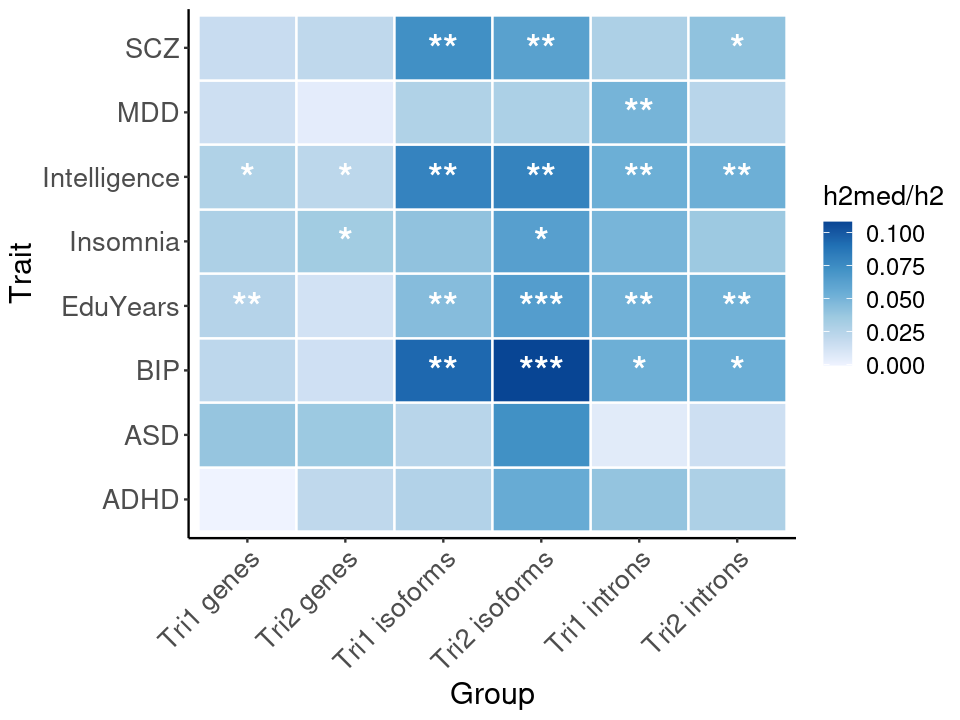

In [29]:
# pal <- wes_palette("Zissou1", 100, type = "continuous")

options(repr.plot.height = 6, repr.plot.width = 8)

ggplot(df, aes(x = Group, y = Trait, fill = Estimate_over_h2)) +
    geom_tile(color = "white", size = 0.5) +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          legend.position = "right") +
          scale_fill_distiller(name = "h2med/h2", palette = "Blues", direction = 1) +
    geom_text(aes(label = sig_FDR), color = "white", size = 8, fontface = "bold")

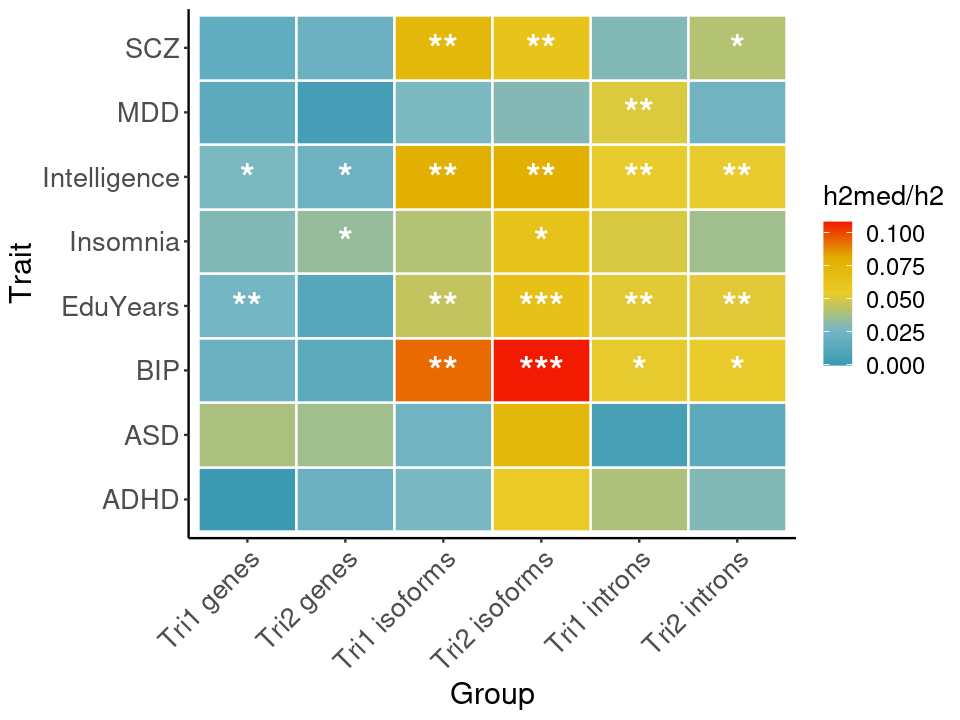

In [30]:
pal <- wes_palette("Zissou1", 100, type = "continuous")

ggplot(df, aes(x = Group, y = Trait, fill = Estimate_over_h2)) +
    geom_tile(colour = "white", size = 0.5) +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          legend.position = "right") +
          scale_fill_gradientn(colours = pal, name = "h2med/h2") +
    geom_text(aes(label = sig_FDR), color = "white", size = 8, fontface = "bold")

In [31]:
ggsave("../figures/mesc_fdr.pdf", height = 6, width = 8)

**Stratify to LDSC baseline annotations**

In [24]:
setwd("..")

In [25]:
gene.results <- list.files(path = "out/", pattern = "^all.gene.*.all.h2med")
gene.baseline.results <- list.files(path = "out/", pattern = "^LDSCbaseline.all.gene.*.all.h2med")

In [26]:
setwd("out")

In [27]:
gene.results
gene.baseline.results

[1] "all.gene.ADHD.Demontis.2019.all.h2med"                        
[2] "all.gene.ALZ.Jansen.2019.all.h2med"                           
[3] "all.gene.ASD.iPSYCHPGC.2018.all.h2med"                        
[4] "all.gene.EduYears.SSGAC.Lee2018.all.h2med"                    
[5] "all.gene.Insomnia.Jansen.2018.all.h2med"                      
[6] "all.gene.Intelligence.SavageNatGen.2018.all.h2med"            
[7] "all.gene.MDD.Howard.PGC.2019.all.h2med"                       
[8] "all.gene.pgc-bip2021-all.all.h2med"                           
[9] "all.gene.PGC3_SCZ_wave3.european.autosome.public.v3.all.h2med"

[1] "LDSCbaseline.all.gene.ADHD.Demontis.2019.all.h2med"                        
[2] "LDSCbaseline.all.gene.ALZ.Jansen.2019.all.h2med"                           
[3] "LDSCbaseline.all.gene.ASD.iPSYCHPGC.2018.all.h2med"                        
[4] "LDSCbaseline.all.gene.EduYears.SSGAC.Lee2018.all.h2med"                    
[5] "LDSCbaseline.all.gene.Insomnia.Jansen.2018.all.h2med"                      
[6] "LDSCbaseline.all.gene.Intelligence.SavageNatGen.2018.all.h2med"            
[7] "LDSCbaseline.all.gene.MDD.Howard.PGC.2019.all.h2med"                       
[8] "LDSCbaseline.all.gene.pgc-bip2021-all.all.h2med"                           
[9] "LDSCbaseline.all.gene.PGC3_SCZ_wave3.european.autosome.public.v3.all.h2med"

In [28]:
for (i in 1:length(gene.results)) {
    file_name <- sub('all.gene.', '', gene.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(gene.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

gene.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
gene.df <- gene.df %>% filter(Quantity == "h2med")
gene.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
gene.df$Group <- "Genes"

for (i in 1:length(gene.baseline.results)) {
    file_name <- sub('LDSCbaseline.all.gene.', '', gene.baseline.results[i])
    file_name <- sub('.all.h2med', '', file_name)
    file_df <- read.table(gene.baseline.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

gene.baseline.df <- rbind(ADHD.Demontis.2019, ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, 
                EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.Howard.PGC.2019, `pgc-bip2021-all`,
                PGC3_SCZ_wave3.european.autosome.public.v3)
gene.baseline.df <- gene.baseline.df %>% filter(Quantity == "h2med")
gene.baseline.df$Trait <- c("ADHD.Demontis.2019", "ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", 
                  "EduYears.SSGAC.Lee2018", 
                  "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.Howard.PGC.2019", "pgc-bip2021-all", 
                  "PGC3_SCZ_wave3.european.autosome.public.v3")
gene.baseline.df$Group <- "Genes, stratified to baselines"

In [29]:
df <- rbind(gene.df, gene.baseline.df)
df <- df %>% filter(Trait != "ALZ.Jansen.2019")
df$Group <- factor(df$Group, levels = c("Genes, stratified to baselines", "Genes"))
df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)
# df

In [30]:
df$FDR <- p.adjust(df$PVAL.est_over_h2, method = 'fdr')

In [31]:
df$sig <- NA
for (i in 1:nrow(df)) {
    if(df[i,'FDR'] > 0.05) {
        df[i,'sig'] <- ''
    }
    if(df[i,'FDR'] < 0.05 & df[i,'FDR'] > 0.01) {
        df[i,'sig'] <- '*'
    }
    if(df[i,'FDR'] < 0.01 & df[i,'FDR'] > 0.001) {
        df[i,'sig'] <- '**'
    }
    if(df[i,'FDR'] < 0.001) {
        df[i,'sig'] <- '***'
    }
}

In [32]:
df[df$Trait == "ADHD.Demontis.2019", 'Trait'] <- 'ADHD'
# df[df$Trait == "ALZ.Jansen.2019", 'Trait'] <- 'ALZ'
df[df$Trait == "ASD.iPSYCHPGC.2018", 'Trait'] <- 'ASD'
df[df$Trait == "EduYears.SSGAC.Lee2018", 'Trait'] <- 'EduYears'
df[df$Trait == "Insomnia.Jansen.2018", 'Trait'] <- 'Insomnia'
df[df$Trait == "Intelligence.SavageNatGen.2018", 'Trait'] <- 'Intelligence'
df[df$Trait == "MDD.Howard.PGC.2019", 'Trait'] <- 'MDD'
df[df$Trait == "pgc-bip2021-all", 'Trait'] <- 'BIP'
df[df$Trait == "PGC3_SCZ_wave3.european.autosome.public.v3", 'Trait'] <- 'SCZ'

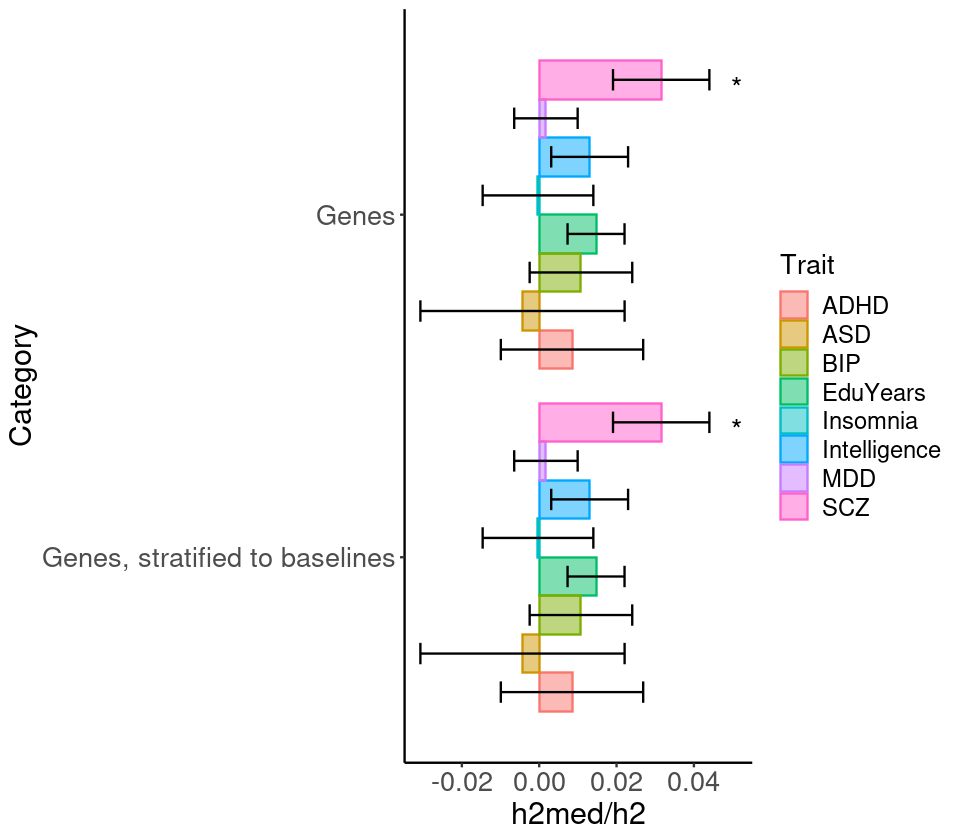

In [33]:
options(repr.plot.height = 7, repr.plot.width = 8)


ggplot(df, aes(y = Group, x = Estimate_over_h2, color = Trait, fill = Trait,
               xmin = (Estimate_over_h2 - SE.Estimate_over_h2.),
               xmax = (Estimate_over_h2 + SE.Estimate_over_h2.))) +
    geom_bar(stat = "identity", alpha = 0.5, position = position_dodge(width = .9)) +
    geom_errorbar(width = 0.5, 
                  position = position_dodge(width = .9),
                  color = "black") +
    theme_classic() +
    labs(y = "Category",
         x = "h2med/h2") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "right",
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    geom_text(aes(x = Estimate_over_h2 + SE.Estimate_over_h2. + 0.007, label = sig), 
              color = "black", size = 6, position = position_dodge(width = .85))

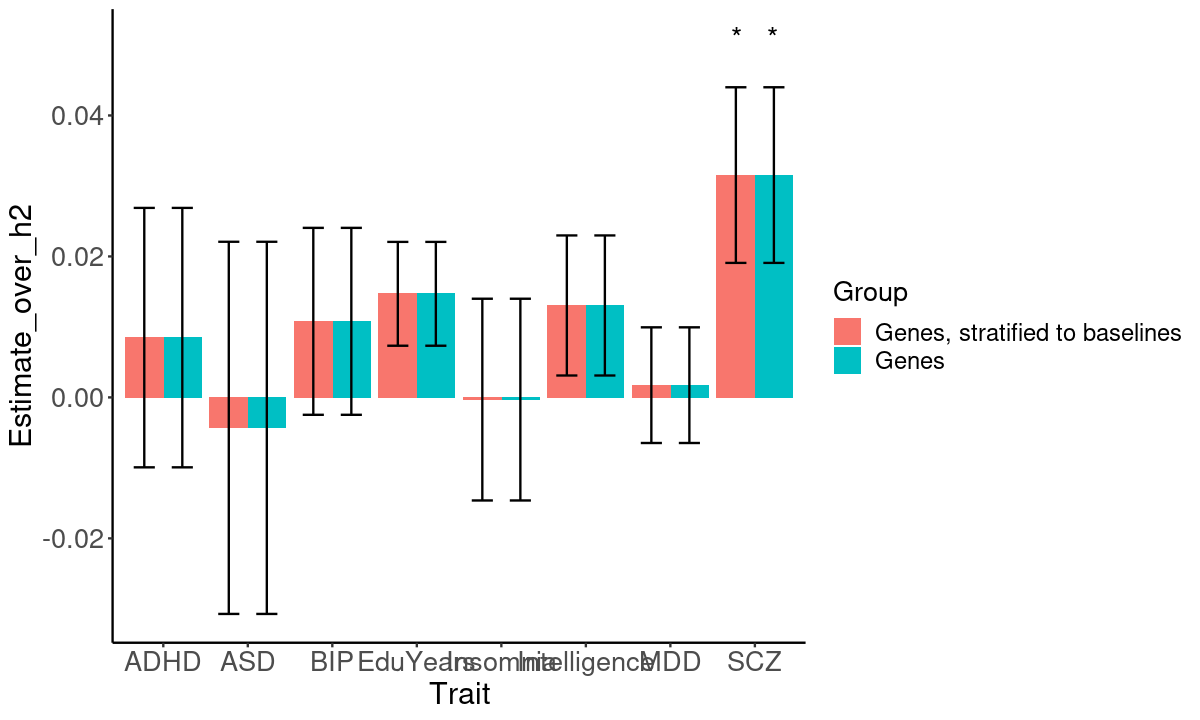

In [34]:
options(repr.plot.height = 6, repr.plot.width = 10)

ggplot(df, aes(x = Trait, y = Estimate_over_h2, fill = Group, 
               ymin = (Estimate_over_h2 - SE.Estimate_over_h2.),
               ymax = (Estimate_over_h2 + SE.Estimate_over_h2.))) +
    geom_bar(stat = "identity", position = "dodge") +
    geom_errorbar(width = 0.5, 
                  position = position_dodge(width = .9),
                  color = "black") +
    theme_classic() +
    labs(y = "Estimate_over_h2",
         x = "Trait") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "right",
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    geom_text(aes(y = Estimate_over_h2 + SE.Estimate_over_h2. + 0.007, label = sig), 
              color = "black", size = 6, position = position_dodge(width = .85))